In [218]:
import pandas as pd
import openpyxl
import states
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# !pip install openpyxl

## Get and clean up data

In [15]:
# read in files
gdp = pd.read_csv("gdp_by_state.csv")  # https://apps.bea.gov/regional/downloadzip.cfm
legislators = pd.read_csv("legislators-current.csv")
states_df = pd.Series(states.us_state_to_abbrev).reset_index()

In [16]:
# rename gdp fields when needed, review quarters --> states are names
gdp.rename(columns={'Unnamed: 1': 'Currency'}, inplace=True)  # probably don't need this
# remove 
gdp.drop(columns="GeoFips", inplace=True)
gdp.set_index("GeoName", inplace=True)
# gdp

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
GeoName,,,,,,,,,,,,,,,,,,,,,
Alabama,104811.9,110212.0,115680.1,119851.7,122915.5,127505.0,134152.6,147715.2,158846.8,166469.0,...,183916.6,189245.5,194786.9,197406.9,202372.4,207368.4,215085.9,224046.9,231171.8,226896.5
Alaska,25810.8,24227.5,24744.3,26806.6,28494.1,29756.8,32037.9,35302.4,40356.6,45094.1,...,56896.3,58283.6,57247.7,56484.9,51490.9,50727.7,53089.3,54711.7,54547.1,49820.0
Arizona,132281.0,143302.6,155755.8,165110.7,171909.6,180522.3,193634.9,206541.1,227915.9,245957.0,...,260915.7,271440.0,278591.6,287666.6,299393.3,313081.4,330416.1,349907.5,369988.2,373719.0
Arkansas,59846.3,62396.7,66811.3,68678.5,70616.7,74113.9,78695.1,85199.6,90887.7,95875.1,...,105768.1,108492.1,113227.3,116139.4,117786.8,119152.4,122350.2,127306.5,130839.9,130750.7
California,1071117.0,1147520.4,1241899.7,1356975.4,1375761.3,1418429.6,1497918.7,1588177.4,1698560.4,1812210.0,...,2023500.0,2113096.4,2220389.9,2335286.5,2473555.9,2569634.0,2730973.9,2895101.0,3052645.2,3007187.7
Colorado,136898.7,150330.0,163763.3,180063.2,186695.8,190019.0,196126.5,204167.2,220783.7,232646.7,...,267516.1,276823.1,292140.5,309542.6,320721.1,329911.7,348898.1,371424.6,392218.0,382584.7
Connecticut,138331.8,145475.5,152287.5,165614.3,171216.6,173248.3,178702.2,195354.9,205214.6,219768.4,...,233158.7,240911.9,241517.4,246597.0,259487.8,263670.3,271582.6,280692.0,288109.1,276422.9
Delaware,33353.4,37106.0,40345.1,43451.3,46096.1,45508.3,47686.1,51353.7,52153.5,55174.4,...,61372.2,62354.6,61716.2,68354.7,71913.9,69355.0,68763.8,72488.0,77042.2,75786.5
District of Columbia,52503.6,54815.3,58819.2,61092.9,65442.9,69919.5,73957.1,80140.1,84867.6,88125.0,...,109730.4,112157.0,114540.1,119414.6,124604.7,129648.6,133391.2,139784.8,144405.7,144554.8


In [9]:
# transpose for ease
gdpt = gdp.transpose()
gdpt = gdpt[1:]
# gdpt

GeoName,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1998,110212.0,24227.5,143302.6,62396.7,1147520.4,150330.0,145475.5,37106.0,54815.3,429138.4,...,20228.1,167394.6,645142.6,62296.1,16080.7,231384.0,209741.1,40014.6,162609.3,14840.2
1999,115680.1,24744.3,155755.8,66811.3,1241899.7,163763.3,152287.5,40345.1,58819.2,458058.9,...,21078.7,176281.9,679870.3,66019.3,17176.9,249801.1,229797.9,41714.3,172224.1,15679.7
2000,119851.7,26806.6,165110.7,68678.5,1356975.4,180063.2,165614.3,43451.3,61092.9,490429.8,...,22743.3,182247.2,738677.0,70295.9,18341.1,268470.9,237378.2,42495.6,180427.3,17152.5
2001,122915.5,28494.1,171909.6,70616.7,1375761.3,186695.8,171216.6,46096.1,65442.9,519058.6,...,23412.1,186441.3,773375.5,73057.6,19323.2,285635.9,238418.6,43973.3,188163.1,18708.3
2002,127505.0,29756.8,180522.3,74113.9,1418429.6,190019.0,173248.3,45508.3,69919.5,553010.3,...,26322.1,195764.3,789817.6,75796.9,20273.0,295355.7,245978.5,45580.8,194658.8,19165.6
2003,134152.6,32037.9,193634.9,78695.1,1497918.7,196126.5,178702.2,47686.1,73957.1,590483.1,...,27216.1,205126.4,833342.3,78945.4,21293.2,311665.7,255370.2,47039.9,203339.2,21193.6
2004,147715.2,35302.4,206541.1,85199.6,1588177.4,204167.2,195354.9,51353.7,80140.1,646630.6,...,29271.3,219327.9,913444.4,86081.9,22938.2,332115.1,268378.3,49741.4,215537.1,23429.4
2005,158846.8,40356.6,227915.9,90887.7,1698560.4,220783.7,205214.6,52153.5,84867.6,705851.9,...,30997.4,231633.5,995252.4,95355.1,23608.6,358069.7,293676.0,53492.5,227297.0,27576.3
2006,166469.0,45094.1,245957.0,95875.1,1812210.0,232646.7,219768.4,55174.4,88125.0,750523.8,...,32364.5,243583.9,1103197.6,106537.3,24331.5,376235.7,314265.2,57010.0,237569.3,32740.3
2007,172975.2,49583.7,261392.0,98381.6,1898902.0,248446.5,234540.7,56612.8,93785.4,782712.5,...,35073.0,248692.4,1191093.1,114813.4,24797.7,391699.8,342024.2,59273.5,245839.5,36950.8


In [10]:
state_gdp = gdpt.sum().reset_index()
# state_gdp

,GeoName,0
0,Alabama,3971327.3
1,Alaska,1038115.1
2,Arizona,5847664.6
3,Arkansas,2282171.0
4,California,46246679.3
5,Colorado,6033222.0
6,Connecticut,5150500.2
7,Delaware,1336107.4
8,District of Columbia,2309286.3
9,Florida,17513592.1


In [13]:
# look at legislators --> states are abbreviations
# legislators

,last_name,first_name,middle_name,suffix,nickname,full_name,birthday,gender,type,state,...,opensecrets_id,lis_id,fec_ids,cspan_id,govtrack_id,votesmart_id,ballotpedia_id,washington_post_id,icpsr_id,wikipedia_id
0,Brown,Sherrod,NaN,NaN,NaN,Sherrod Brown,1952-11-09,M,sen,OH,...,N00003535,S307,"H2OH13033,S6OH00163",5051.0,400050,27018.0,Sherrod Brown,NaN,29389.0,Sherrod Brown
1,Cantwell,Maria,NaN,NaN,NaN,Maria Cantwell,1958-10-13,F,sen,WA,...,N00007836,S275,"S8WA00194,H2WA01054",26137.0,300018,27122.0,Maria Cantwell,NaN,39310.0,Maria Cantwell
2,Cardin,Benjamin,L.,NaN,NaN,Benjamin L. Cardin,1943-10-05,M,sen,MD,...,N00001955,S308,"H6MD03177,S6MD03177",4004.0,400064,26888.0,Ben Cardin,NaN,15408.0,Ben Cardin
3,Carper,Thomas,Richard,NaN,NaN,Thomas R. Carper,1947-01-23,M,sen,DE,...,N00012508,S277,S8DE00079,663.0,300019,22421.0,Tom Carper,NaN,15015.0,Tom Carper
4,Casey,Robert,P.,Jr.,Bob,"Robert P. Casey, Jr.",1960-04-13,M,sen,PA,...,N00027503,S309,S6PA00217,47036.0,412246,2541.0,"Bob Casey, Jr.",NaN,40703.0,Bob Casey Jr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Stansbury,Melanie,Ann,NaN,NaN,Melanie A. Stansbury,1979-01-31,F,rep,NM,...,N00047871,NaN,H2NM01144,NaN,456861,NaN,Melanie Ann Stansbury,NaN,NaN,Melanie Stansbury
536,Ellzey,Jake,NaN,NaN,NaN,Jake Ellzey,1970-01-24,M,rep,TX,...,NaN,NaN,H8TX06266,NaN,456862,NaN,Jake Ellzey,NaN,NaN,Jake Ellzey
537,Brown,Shontel,M.,NaN,NaN,Shontel M. Brown,1975-06-24,F,rep,OH,...,NaN,NaN,H2OH11169,NaN,456863,NaN,NaN,NaN,NaN,Shontel Brown
538,Carey,Mike,NaN,NaN,NaN,Mike Carey,1971-03-13,M,rep,OH,...,NaN,NaN,H2OH15228,NaN,456864,NaN,NaN,NaN,NaN,Mike Carey (politician)


In [18]:
# get designated states dataframe to convert abbreviations to names
states_df.columns = ['StateName', 'StateAbbrev']
# states_df

,StateName,StateAbbrev
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,Florida,FL
9,Georgia,GA


In [19]:
gdp_summary = state_gdp.merge(states_df, how="inner", left_on="GeoName", right_on="StateName")
# gdp_summary

# validated_states = gdp_summary.StateName.values
# len(validated_states)

,GeoName,0,StateName,StateAbbrev
0,Alabama,3971327.3,Alabama,AL
1,Alaska,1038115.1,Alaska,AK
2,Arizona,5847664.6,Arizona,AZ
3,Arkansas,2282171.0,Arkansas,AR
4,California,46246679.3,California,CA
5,Colorado,6033222.0,Colorado,CO
6,Connecticut,5150500.2,Connecticut,CT
7,Delaware,1336107.4,Delaware,DE
8,District of Columbia,2309286.3,District of Columbia,DC
9,Florida,17513592.1,Florida,FL


In [25]:
joined_leg = legislators.merge(gdp_summary, how="left", left_on="state", right_on="StateAbbrev")

#expect 540 rows returned
len(joined_leg)

540

In [26]:
# joined_leg

,last_name,first_name,middle_name,suffix,nickname,full_name,birthday,gender,type,state,...,govtrack_id,votesmart_id,ballotpedia_id,washington_post_id,icpsr_id,wikipedia_id,GeoName,0,StateName,StateAbbrev
0,Brown,Sherrod,NaN,NaN,NaN,Sherrod Brown,1952-11-09,M,sen,OH,...,400050,27018.0,Sherrod Brown,NaN,29389.0,Sherrod Brown,Ohio,11887340.3,Ohio,OH
1,Cantwell,Maria,NaN,NaN,NaN,Maria Cantwell,1958-10-13,F,sen,WA,...,300018,27122.0,Maria Cantwell,NaN,39310.0,Maria Cantwell,Washington,8586927.0,Washington,WA
2,Cardin,Benjamin,L.,NaN,NaN,Benjamin L. Cardin,1943-10-05,M,sen,MD,...,400064,26888.0,Ben Cardin,NaN,15408.0,Ben Cardin,Maryland,6922004.2,Maryland,MD
3,Carper,Thomas,Richard,NaN,NaN,Thomas R. Carper,1947-01-23,M,sen,DE,...,300019,22421.0,Tom Carper,NaN,15015.0,Tom Carper,Delaware,1336107.4,Delaware,DE
4,Casey,Robert,P.,Jr.,Bob,"Robert P. Casey, Jr.",1960-04-13,M,sen,PA,...,412246,2541.0,"Bob Casey, Jr.",NaN,40703.0,Bob Casey Jr.,Pennsylvania,13538654.6,Pennsylvania,PA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Stansbury,Melanie,Ann,NaN,NaN,Melanie A. Stansbury,1979-01-31,F,rep,NM,...,456861,NaN,Melanie Ann Stansbury,NaN,NaN,Melanie Stansbury,New Mexico,1815067.9,New Mexico,NM
536,Ellzey,Jake,NaN,NaN,NaN,Jake Ellzey,1970-01-24,M,rep,TX,...,456862,NaN,Jake Ellzey,NaN,NaN,Jake Ellzey,Texas,28458956.6,Texas,TX
537,Brown,Shontel,M.,NaN,NaN,Shontel M. Brown,1975-06-24,F,rep,OH,...,456863,NaN,NaN,NaN,NaN,Shontel Brown,Ohio,11887340.3,Ohio,OH
538,Carey,Mike,NaN,NaN,NaN,Mike Carey,1971-03-13,M,rep,OH,...,456864,NaN,NaN,NaN,NaN,Mike Carey (politician),Ohio,11887340.3,Ohio,OH


## EDA

### GDP

<AxesSubplot:>

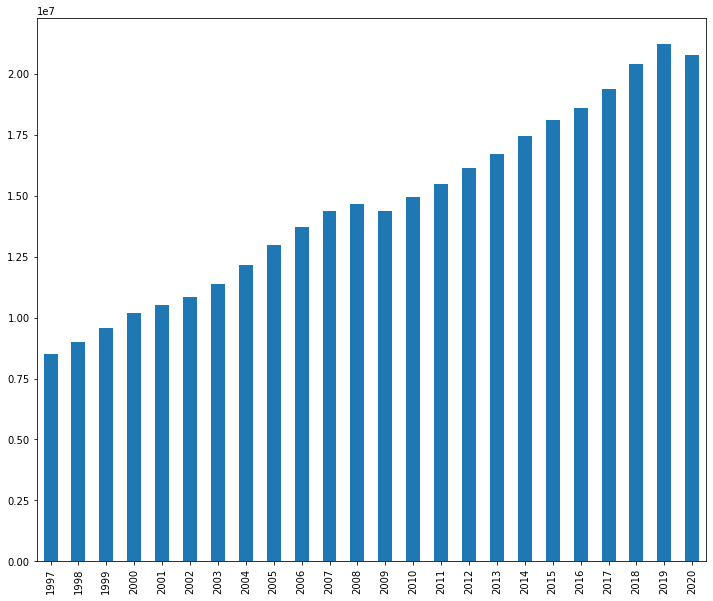

In [176]:
gdp.T.sum(axis=1).plot(kind="bar", figsize=(12,10))

<AxesSubplot:xlabel='GeoName'>

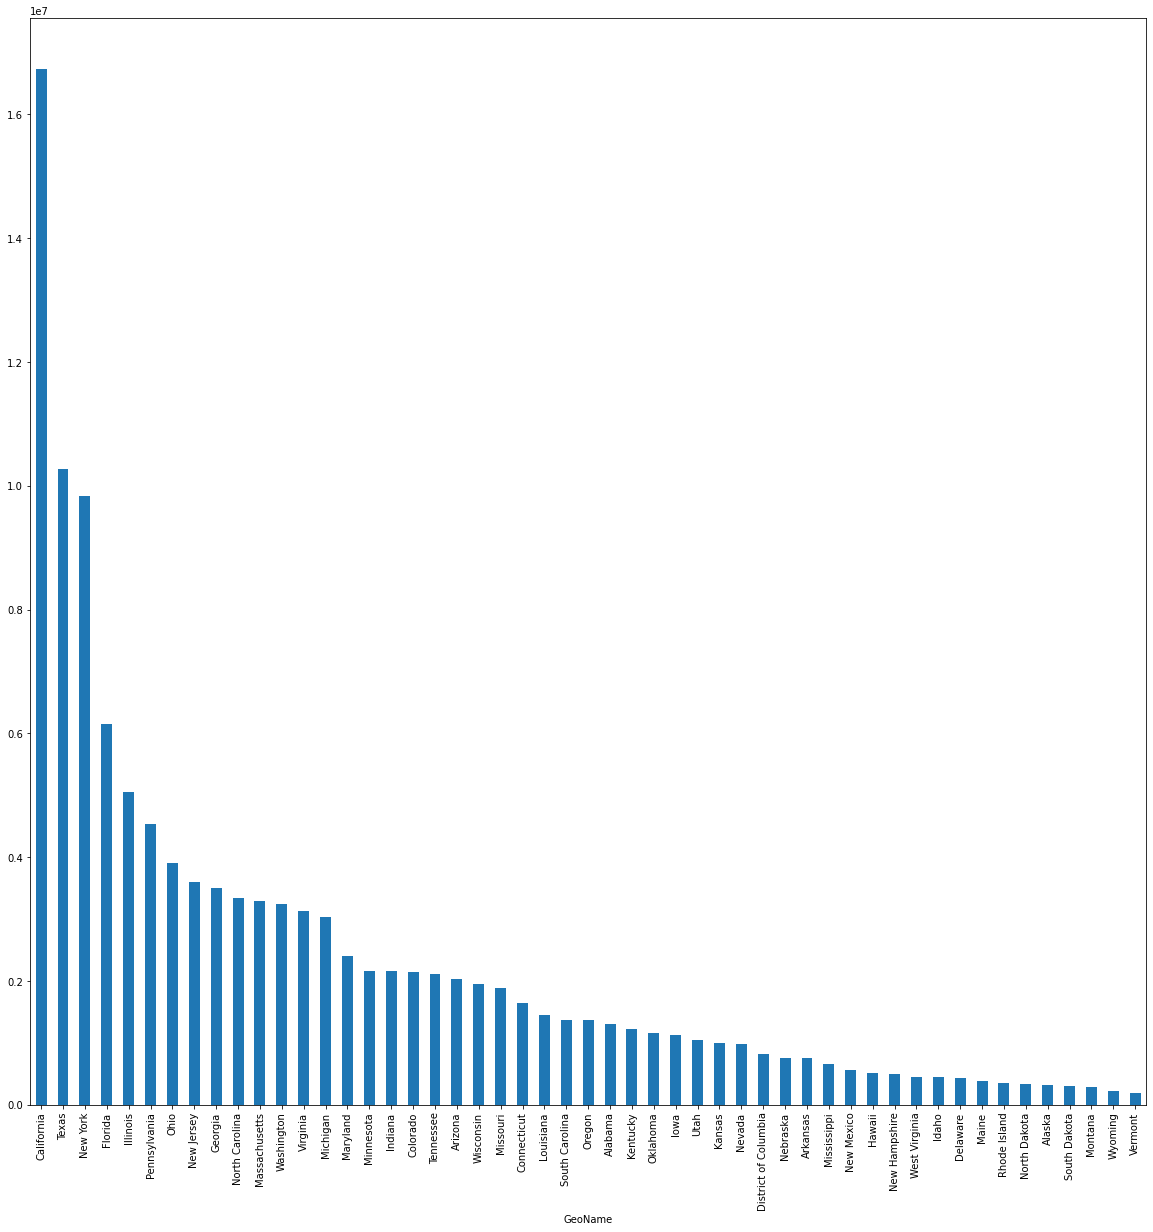

In [49]:
# state_gdp
gdp.loc[:, '2015':].sum(axis=1).sort_values(ascending=False).plot(kind="bar", figsize=(20,20))

In [70]:
# setting total GDP sum
tot_gdp = gdp.loc[:, '2015':].sum().sum()

# create proportion table to calculate expected representatives
gdp_prop = gdp.loc[:, '2015':].sum(axis=1) / tot_gdp

#### Determine total contribution to GDP

In [83]:
# convert series to dataframe, give it a name
gdp_prop = pd.DataFrame(gdp_prop, columns=['PercGDPCont'])
# view by sort for ease
gdp_prop.sort_values(by=['PercGDPCont'], ascending=False)

,PercGDPCont
GeoName,
California,0.141227
Texas,0.086774
New York,0.083072
Florida,0.051874
Illinois,0.042636
Pennsylvania,0.038242
Ohio,0.033040
New Jersey,0.030363
Georgia,0.029595


<AxesSubplot:xlabel='GeoName'>

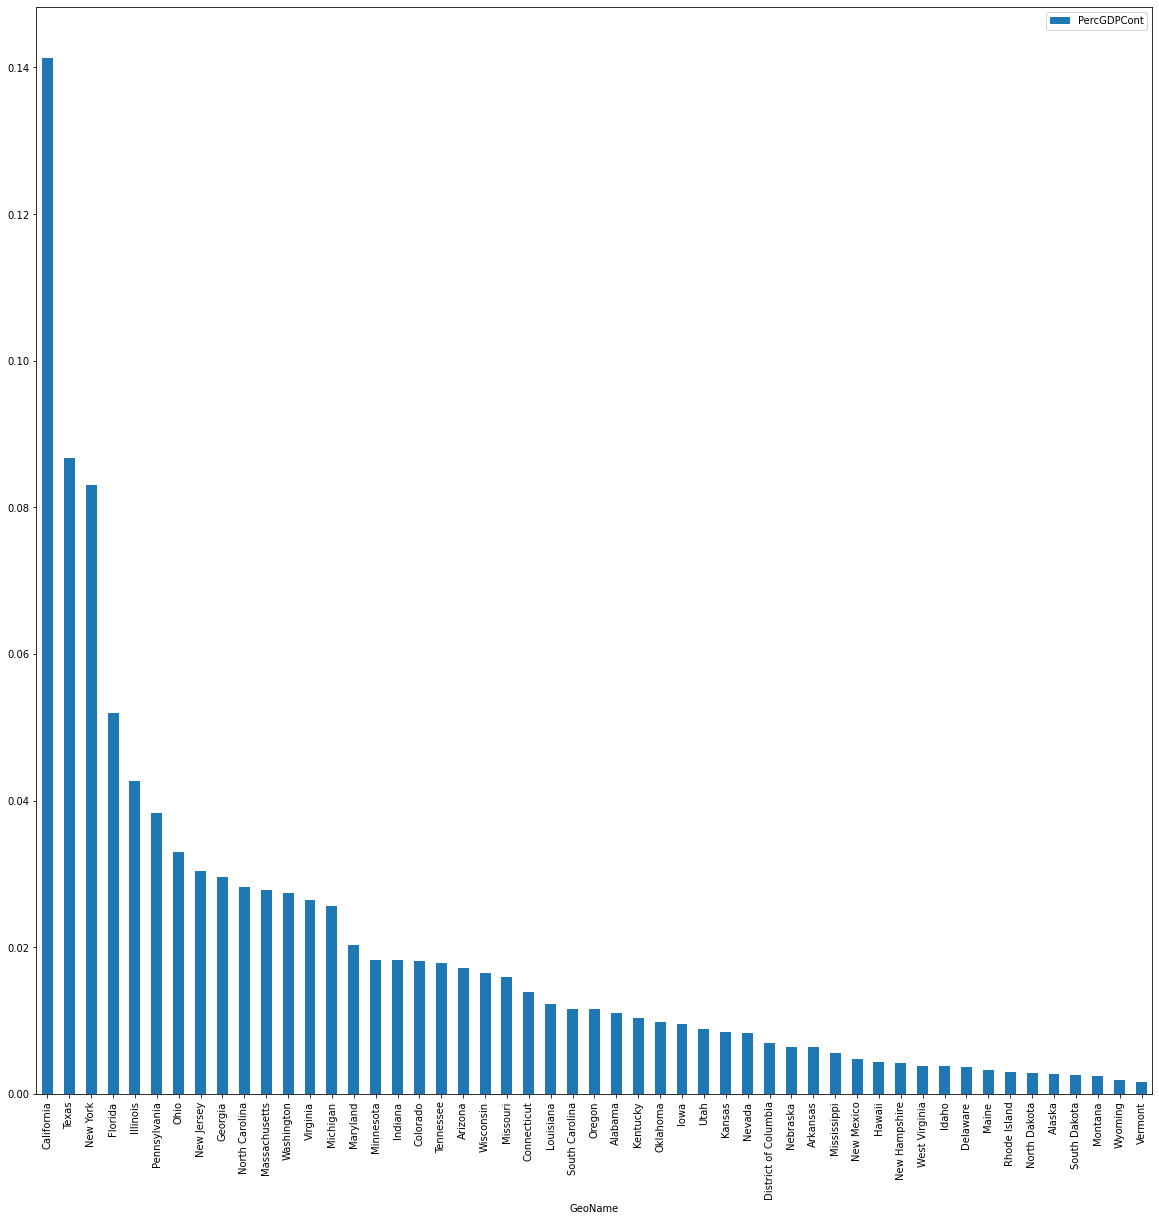

In [81]:
gdp_prop.sort_values(ascending=False, by=['PercGDPCont']).plot(kind="bar", figsize=(20,20))

#### Gather all values for calculations

In [116]:
# get all representatives in congress
total_cong = len(legislators[legislators['type'] == 'rep'])

# calculate expected rep congress
expected_cong = gdp_prop * total_cong
expected_cong.columns = ['expCong']

# get actual rep in congress size
act_cong = pd.Series(joined_leg.groupby('StateName').size(), name='act_cong')

# get actual republican congress people
reps = pd.Series(joined_leg[joined_leg.party == "Republican"].groupby('StateName').size(), name='act_rs')

In [149]:
# create comparison table for plots
comp_tab = pd.concat([expected_cong, act_cong], axis=1)
# join with actual republicans
comp_tab = pd.concat([comp_tab, reps], axis=1)
# determine representation. positive number means over-representation by GDP
comp_tab['diff'] = comp_tab['act_cong'] - comp_tab['expCong']
# get percent republican to see if difference between higher and lower perc_r states
comp_tab['perc_r'] = comp_tab['act_rs'] / comp_tab['act_cong']
# view by difference
comp_tab.sort_values(by=['diff'], ascending=True)
comp_tab = comp_tab.round(4)
comp_tab

,expCong,act_cong,act_rs,diff,perc_r
Alabama,4.8546,9,8.0,4.1454,0.8889
Alaska,1.1678,3,3.0,1.8322,1.0000
Arizona,7.5645,11,4.0,3.4355,0.3636
Arkansas,2.7791,6,6.0,3.2209,1.0000
California,62.1397,54,10.0,-8.1397,0.1852
Colorado,7.9703,9,3.0,1.0297,0.3333
Connecticut,6.0916,7,NaN,0.9084,NaN
Delaware,1.6171,3,NaN,1.3829,NaN
District of Columbia,3.0325,1,NaN,-2.0325,NaN
Florida,22.8246,29,18.0,6.1754,0.6207


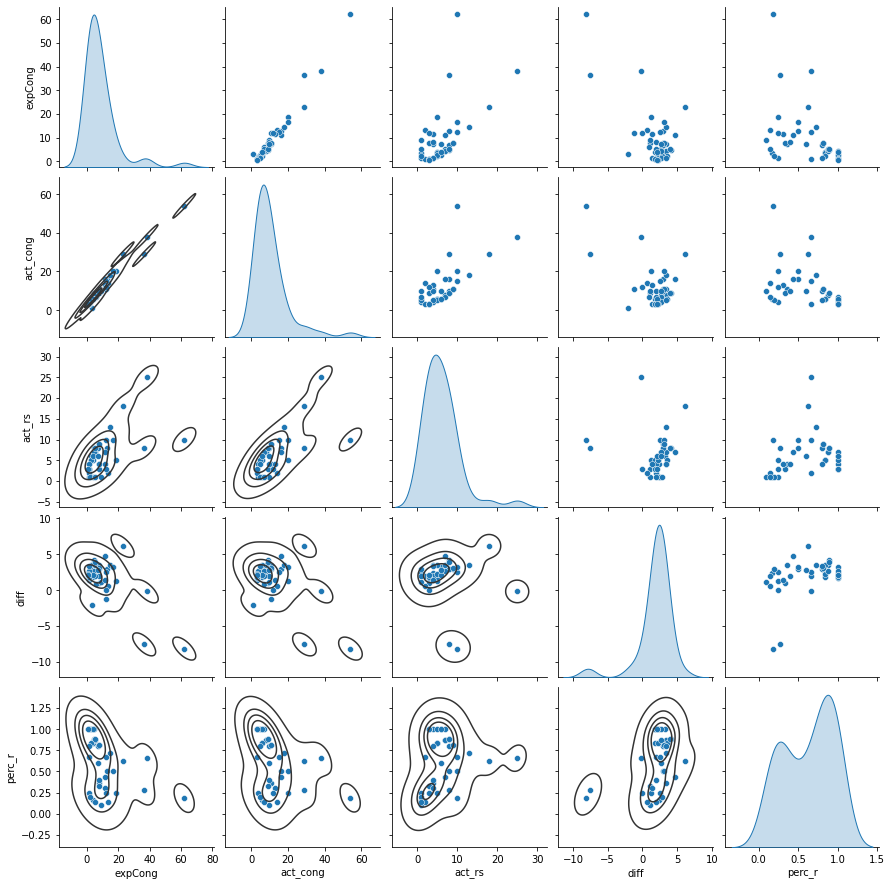

In [156]:
# try plotting
g = sns.pairplot(comp_tab, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=5, color=".2")

In [193]:
# sns.scatterplot(x=comp_tab['act_rs'], y=comp_tab['diff'])

In [158]:
# Goodness of fit test
k = len(comp_tab)
df_k = k - 1
alpha = 0.01

crit_val = round(st.chi2.ppf(1 - alpha, df_k), 4)
print(f"Critical value: {crit_val}")

chi_sq_calc = sum( ( (comp_tab.expCong.values - comp_tab.act_cong.values)**2) / comp_tab.act_cong.values)
print(f"Test statistic: {round(chi_sq_calc, 4)}")

claim = "there is a significant difference between observed and expected values"

if chi_sq_calc > crit_val:
    print(f"At alpha = {alpha}, there is sufficient evidence to state {claim}")
else:
    print(f"At alpha = {alpha}, there is not sufficient evidence to state {claim}")

print(f"P-value: {1 - st.chi2.cdf(chi_sq_calc, df_k)}")

Critical value: 76.1539
Test statistic: 52.5179
At alpha = 0.01, there is not sufficient evidence to state there is a significant difference between observed and expected values
P-value: 0.37670628809279605


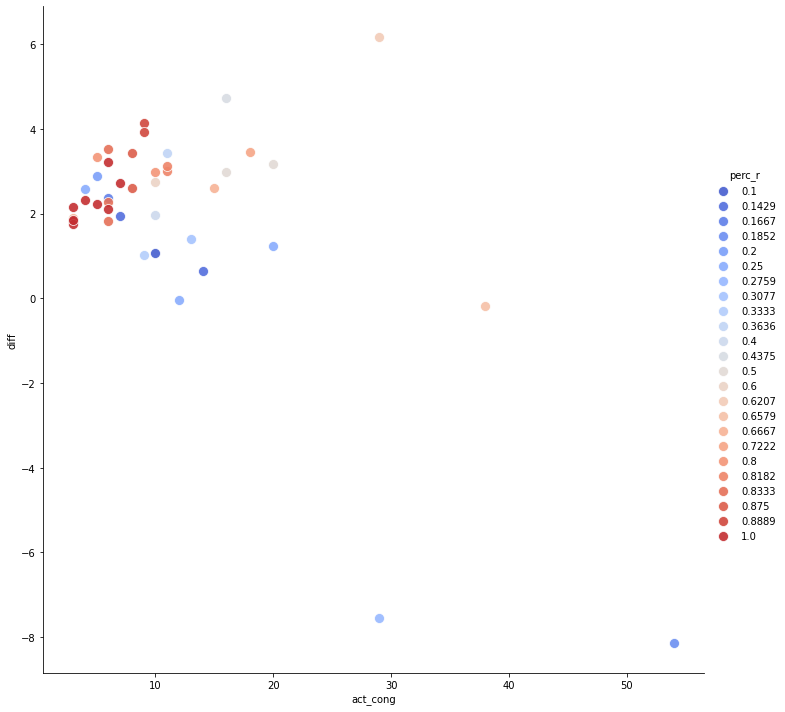

In [196]:
g = sns.FacetGrid(comp_tab, hue="perc_r", height=10, palette="coolwarm")
g.map(sns.scatterplot, "act_cong", "diff", s=100, alpha=.9)
g.add_legend()

In [215]:
# test to see if republican states are more likely to have a difference than not

# Ho: rep = .5
# Ha: rep > .5

# get proportion of states that have difference > 0
# proportion hypo test on alpha = 0.05

over_rep_states = comp_tab[comp_tab['diff'] > 0]
over_rep_r_states = comp_tab[(comp_tab['diff'] > 0) & (comp_tab['perc_r'] > 0.5)]

tot_over_rep_states = len(over_rep_states)
tot_over_rep_r_states = len(over_rep_r_states)

prop_r_over_rep = tot_over_rep_r_states / tot_over_rep_states
prop_r_over_rep

0.5555555555555556

In [220]:
n = len(comp_tab)
p = 0.5

# determine test type
np = n * p #  needs to be > 5 for z
nq = n * (1 - p) #  AND needs to be > 5 for z

# print(f"{np}, {nq}")
# since np and nq are both greater than 5, we can use t-tests 
s = math.sqrt( p * (1 - p) / n)

# find critical value
cv = abs(round(st.norm.ppf(alpha), 4))
print(f"Critical value: {cv}")

# calculate test statistic
z_score =  round((prop_r_over_rep - p) / s, 4)
print(f"Z score: {z_score}")

Critical value: 2.3263
Z score: 0.7935


No sufficient evidence to conclude that that republican states are more likely to be misrepresented

25

In [167]:
comp_tab.index.values

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

### Legislators

In [84]:
legislators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   last_name           540 non-null    object 
 1   first_name          540 non-null    object 
 2   middle_name         247 non-null    object 
 3   suffix              18 non-null     object 
 4   nickname            42 non-null     object 
 5   full_name           540 non-null    object 
 6   birthday            540 non-null    object 
 7   gender              540 non-null    object 
 8   type                540 non-null    object 
 9   state               540 non-null    object 
 10  district            440 non-null    float64
 11  senate_class        100 non-null    float64
 12  party               540 non-null    object 
 13  url                 537 non-null    object 
 14  address             540 non-null    object 
 15  phone               540 non-null    object 
 16  contact_

<AxesSubplot:xlabel='state'>

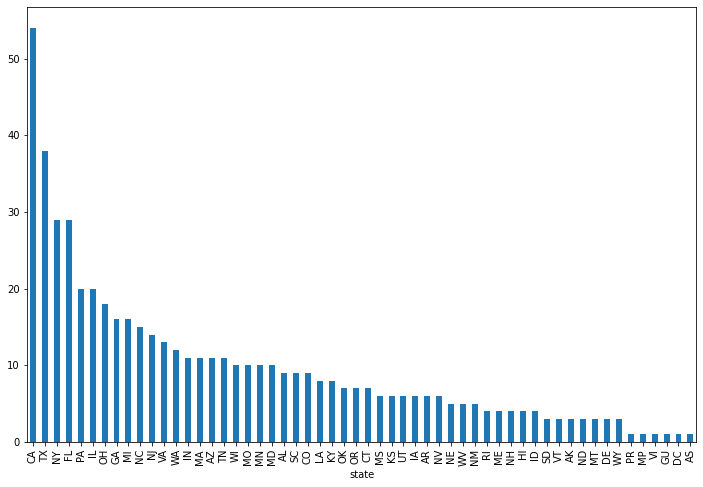

In [24]:
legislators.groupby('state').size().sort_values(ascending=False).plot(kind='bar', figsize=(12,8))

<AxesSubplot:xlabel='gender', ylabel='count'>

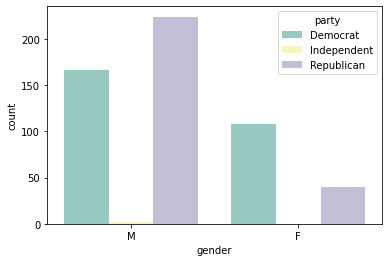

In [85]:
# fig, axes = plt.subplots(1, 2, figsize=(16, 4))
# plt.figure(figsize=(10,8))
sns.countplot(x='gender', palette="Set3", hue='party', data=joined_leg)

<AxesSubplot:xlabel='type', ylabel='count'>

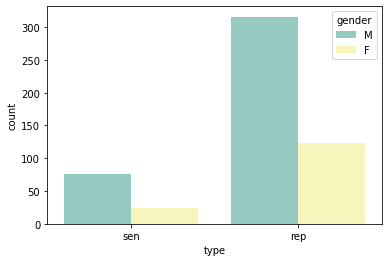

In [86]:
sns.countplot(x='type', palette="Set3", hue='gender', data=joined_leg)

In [ ]:
x,y = 'type', 'gender'

df1 = joined_leg.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar', palette="Set3", data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)